In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

## Data cleaning

In [3]:
df.sample(5)

,sms,label
2402,Babe: U want me dont u baby! Im nasty and have...,1
3801,We tried to contact you re your reply to our o...,1
2673,Super msg da:)nalla timing.\n,0
2647,"Em, its olowoyey@ usc.edu have a great time in...",0
1862,Aiyah then i wait lor. Then u entertain me. He...,0


In [4]:
df.shape

(5574, 2)

In [5]:
# missing values 
df.isnull().sum()

sms      0
label    0
dtype: int64

In [6]:
#checking the duplicate values 
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(5171, 2)

## EDA

In [10]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df['label'].value_counts()

label
0    4518
1     653
Name: count, dtype: int64

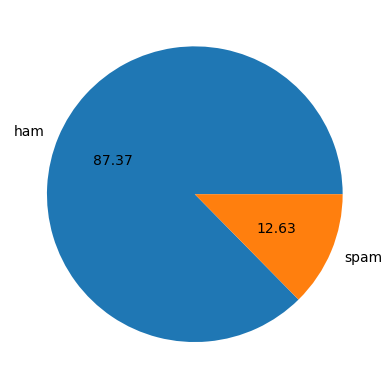

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
#so as we seen data is imbalanced
import nltk  #(NLTK) natural language toolkit

In [14]:
!pip install nltk

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#number of characters
df['num_characters'] = df['sms'].apply(len)

In [17]:
df.head()

,sms,label,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [18]:
#numbers of words 
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,sms,label,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [20]:
#numbers of sentences
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,sms,label,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,112,24,24
1,Ok lar... Joking wif u oni...\n,0,30,8,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,37
3,U dun say so early hor... U c already then say...,0,50,13,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,15


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.603945,18.603945
std,58.333188,13.388286,13.388286
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,9.000000
50%,62.000000,15.000000,15.000000
75%,120.000000,26.500000,26.500000
max,911.000000,220.000000,220.000000


In [23]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.279327,17.279327
std,56.590179,13.572536,13.572536
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,8.000000
50%,54.000000,13.000000,13.000000
75%,92.000000,22.000000,22.000000
max,911.000000,220.000000,220.000000


In [24]:
# ham
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,27.768760
std,29.818940,6.987509,6.987509
min,14.000000,2.000000,2.000000
25%,133.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,158.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

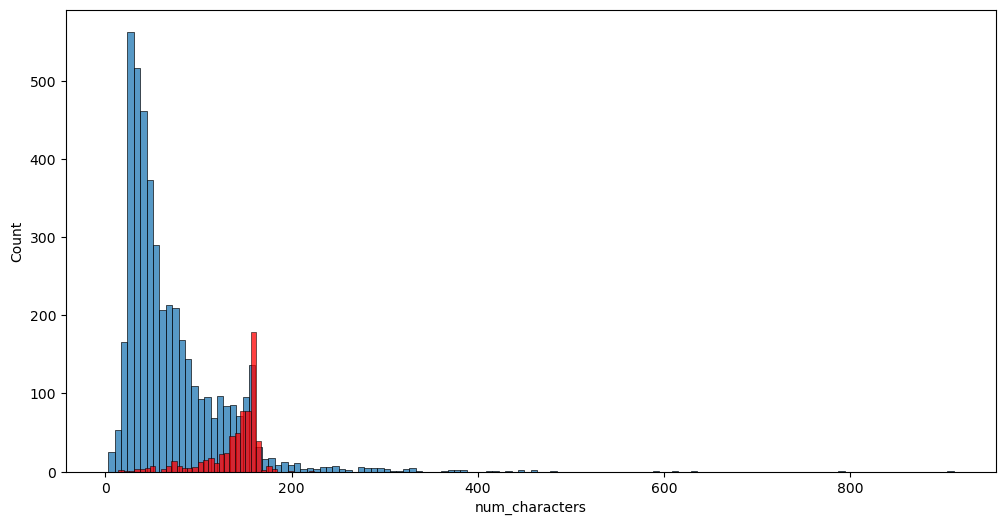

In [26]:
plt.figure(figsize=(12,6))
#plotting histoplot
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

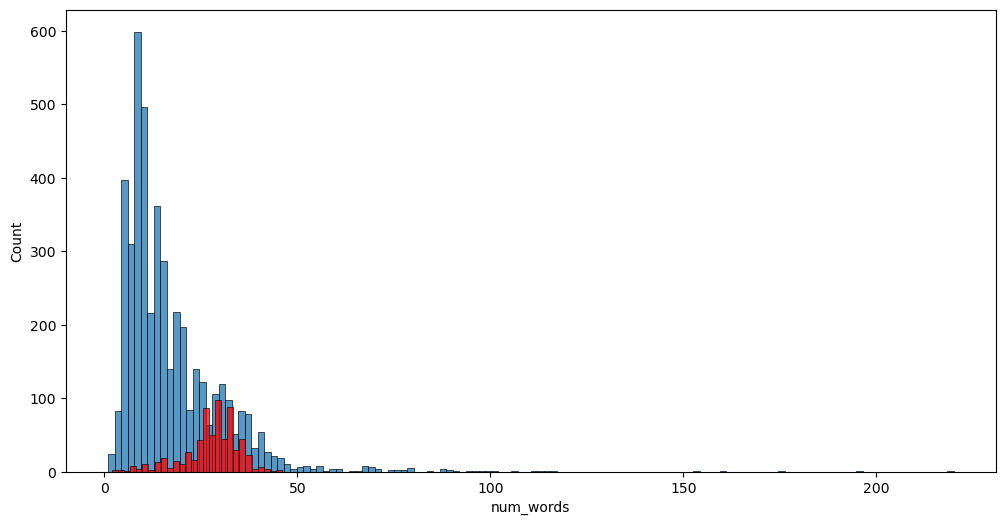

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')


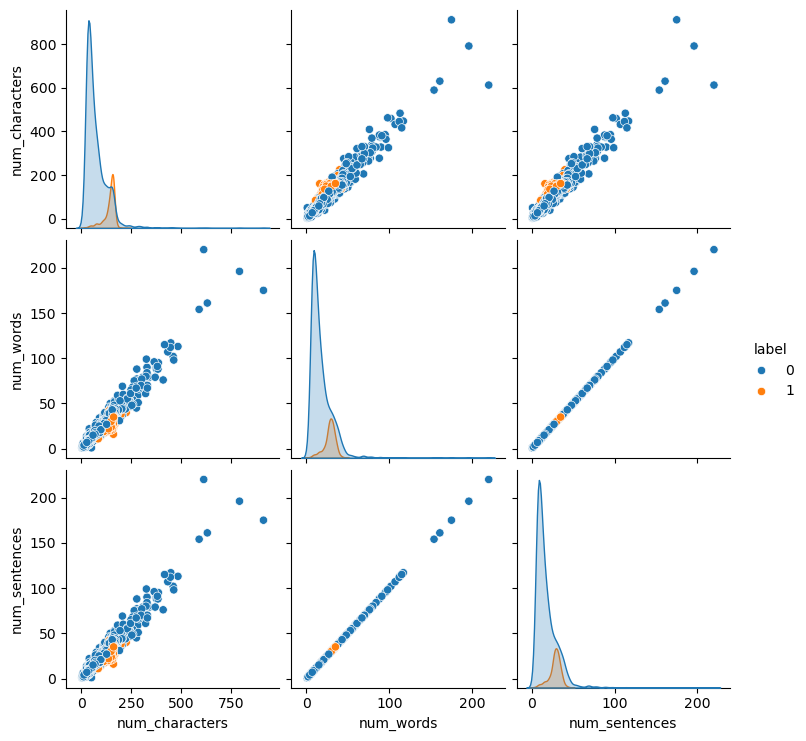

In [28]:
#plotting pairplot
sns.pairplot(df,hue ='label')

<Axes: >

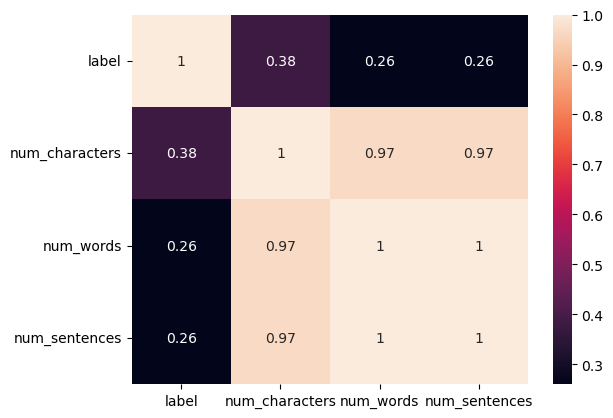

In [29]:
#plotting heatmap
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization (breaking down a text into smaller unit called token)
- Removing special characters
- Removing stop words and punctuation
- Stemming (used to imporve efecience of text analysis)

In [30]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def transform_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Removing stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Joined the filtered words back into a sentence
    transformed_text = ' '.join(filtered_words)

    return transformed_text

In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough today ."

In [32]:
df['sms'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [34]:
df['transformed_sms'] = df['sms'].apply(transform_text)

In [35]:
df.head(10)

,sms,label,num_characters,num_words,num_sentences,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,24,"Go jurong point , crazy .. Available bugis n g..."
1,Ok lar... Joking wif u oni...\n,0,30,8,8,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,37,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,50,13,13,U dun say early hor ... U c already say ...
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,15,"Nah n't think goes usf , lives around though"
5,FreeMsg Hey there darling it's been 3 week's n...,1,148,39,39,FreeMsg Hey darling 's 3 week 's word back ! '...
6,Even my brother is not like to speak with me. ...,0,78,18,18,Even brother like speak . treat like aids pate...
7,As per your request 'Melle Melle (Oru Minnamin...,0,161,31,31,per request 'Melle Melle ( Oru Minnaminunginte...
8,WINNER!! As a valued network customer you have...,1,158,32,32,WINNER ! ! valued network customer selected re...
9,Had your mobile 11 months or more? U R entitle...,1,155,31,31,mobile 11 months ? U R entitled Update latest ...


In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_sms'].str.cat(sep=" "))

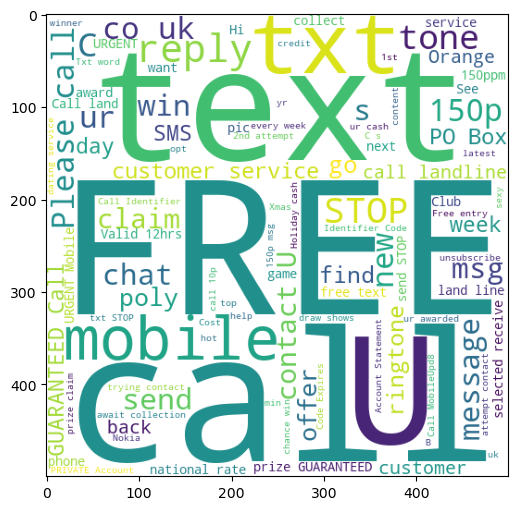

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_sms'].str.cat(sep=" "))

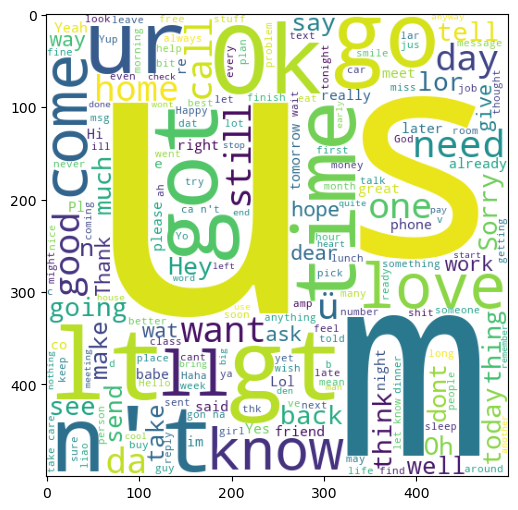

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [42]:
df.head()

,sms,label,num_characters,num_words,num_sentences,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,24,"Go jurong point , crazy .. Available bugis n g..."
1,Ok lar... Joking wif u oni...\n,0,30,8,8,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,37,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,50,13,13,U dun say early hor ... U c already say ...
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,15,"Nah n't think goes usf , lives around though"


In [43]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_sms'].tolist():
    for word in msg.split():# splits each message into a list of words
        spam_corpus.append(word)
#spam_corpus will contain all the individual words from the transformed text of messages labeled as spam.

In [44]:
len(spam_corpus)

13582

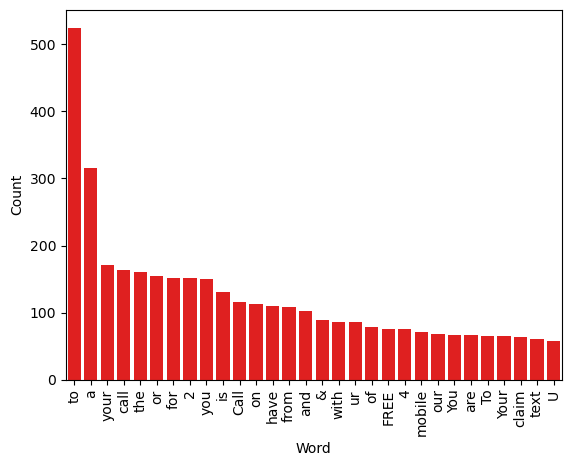

In [45]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have the 'transformed_sms' column as well
spam_corpus = []
for msg in df[df['label'] == 1]['sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Create a Counter object to count occurrences of each word
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common words
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the bar chart using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts, color= 'red')
plt.xticks(rotation='vertical')
plt.show()


In [46]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

50400

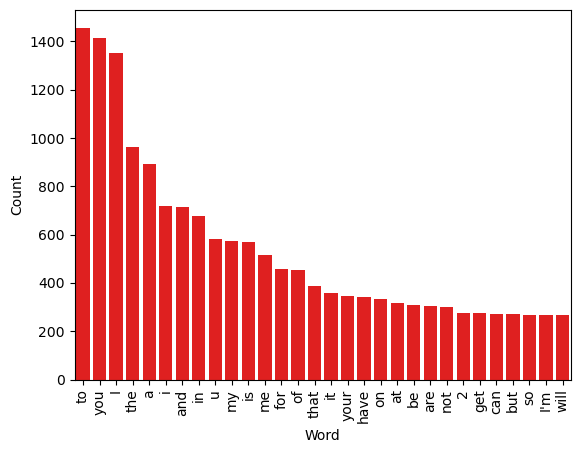

In [48]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have the 'transformed_sms' column as well
spam_corpus = []
for msg in df[df['label'] == 0]['sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Create a Counter object to count occurrences of each word
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common words
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the bar chart using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts, color= 'red')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Text Vectorization
# using Bag of Words
df.head()

,sms,label,num_characters,num_words,num_sentences,transformed_sms
0,"Go until jurong point, crazy.. Available only ...",0,112,24,24,"Go jurong point , crazy .. Available bugis n g..."
1,Ok lar... Joking wif u oni...\n,0,30,8,8,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,37,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,50,13,13,U dun say early hor ... U c already say ...
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,15,"Nah n't think goes usf , lives around though"


## Modelbuilding

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [52]:
X.shape

(5171, 3000)

In [53]:
y = df['label'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit (X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8821256038647343


In [59]:
print(confusion_matrix(y_test,y_pred1))

[[794  93]
 [ 29 119]]


In [60]:
print(precision_score(y_test,y_pred1))

0.5613207547169812


In [61]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9710144927536232


In [62]:
print(confusion_matrix(y_test,y_pred2))

[[887   0]
 [ 30 118]]


In [63]:
print(precision_score(y_test,y_pred2))

1.0


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test,y_pred2))

0.9710144927536232


In [65]:
print(confusion_matrix(y_test,y_pred3))

[[884   3]
 [ 24 124]]


In [66]:
print(precision_score(y_test,y_pred3))

0.9763779527559056


In [67]:
# tfidf(term frequency invers document frequency) --> MNB

In [68]:
!pip install xgboost

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9652173913043478, 0.9666666666666667)

In [74]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

        print("For ", name)
        print("Accuracy - ", current_accuracy)
        print("Precision - ", current_precision)

        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)

    except Exception as e:
        print(f"Error for {name}: {e}")


For  SVC
Accuracy -  0.9652173913043478
Precision -  0.9666666666666667
Error for KN: 'NoneType' object has no attribute 'split'
For  NB
Accuracy -  0.9710144927536232
Precision -  1.0
For  DT
Accuracy -  0.9314009661835749
Precision -  0.8811881188118812
For  LR
Accuracy -  0.9487922705314009
Precision -  0.9523809523809523
For  RF
Accuracy -  0.9681159420289855
Precision -  1.0
For  AdaBoost
Accuracy -  0.9603864734299516
Precision -  0.9495798319327731
For  BgC
Accuracy -  0.9545893719806763
Precision -  0.9105691056910569
For  ETC
Accuracy -  0.9758454106280193
Precision -  0.992
For  GBDT
Accuracy -  0.9449275362318841
Precision -  0.9333333333333333
For  xgb
Accuracy -  0.970048309178744
Precision -  0.968


In [75]:
print(len(clfs.keys()), len(accuracy_scores), len(precision_scores))


11 10 10


In [76]:
print("Length of clfs.keys():", len(clfs.keys()))
print("Length of accuracy_scores:", len(accuracy_scores))
print("Length of precision_scores:", len(precision_scores))
print("Keys of clfs:", list(clfs.keys()))



Length of clfs.keys(): 11
Length of accuracy_scores: 10
Length of precision_scores: 10
Keys of clfs: ['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb']


In [77]:
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys())[:-1], 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.971014,1.000000
4,LR,0.968116,1.000000
7,BgC,0.975845,0.992000
9,GBDT,0.970048,0.968000
0,SVC,0.965217,0.966667
3,DT,0.948792,0.952381
5,RF,0.960386,0.949580
8,ETC,0.944928,0.933333
6,AdaBoost,0.954589,0.910569
2,NB,0.931401,0.881188


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.971014
1,LR,Accuracy,0.968116
2,BgC,Accuracy,0.975845
3,GBDT,Accuracy,0.970048
4,SVC,Accuracy,0.965217
5,DT,Accuracy,0.948792
6,RF,Accuracy,0.960386
7,ETC,Accuracy,0.944928
8,AdaBoost,Accuracy,0.954589
9,NB,Accuracy,0.931401


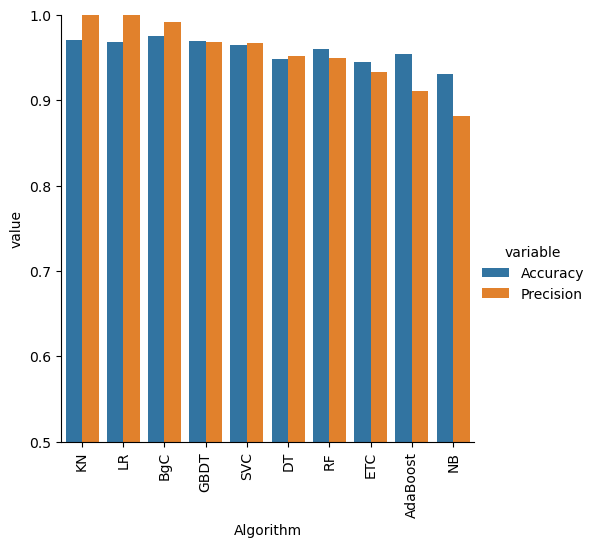

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# model improving
# Change the max_features parameter of tfidf

In [83]:
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys())[:-1],'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys())[:-1],'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':list(clfs.keys())[:-1],'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.971014,1.000000,0.971014,1.000000,0.971014,1.000000,0.971014,1.000000
1,LR,0.968116,1.000000,0.968116,1.000000,0.968116,1.000000,0.968116,1.000000
2,BgC,0.975845,0.992000,0.975845,0.992000,0.975845,0.992000,0.975845,0.992000
3,GBDT,0.970048,0.968000,0.970048,0.968000,0.970048,0.968000,0.970048,0.968000
4,SVC,0.965217,0.966667,0.965217,0.966667,0.965217,0.966667,0.965217,0.966667
5,DT,0.948792,0.952381,0.948792,0.952381,0.948792,0.952381,0.948792,0.952381
6,RF,0.960386,0.949580,0.960386,0.949580,0.960386,0.949580,0.960386,0.949580
7,ETC,0.944928,0.933333,0.944928,0.933333,0.944928,0.933333,0.944928,0.933333
8,AdaBoost,0.954589,0.910569,0.954589,0.910569,0.954589,0.910569,0.954589,0.910569
9,NB,0.931401,0.881188,0.931401,0.881188,0.931401,0.881188,0.931401,0.881188


In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729468599033816
Precision 1.0


In [93]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835748792270531
Precision 0.9851851851851852


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))